In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.simplefilter("ignore")

In [2]:
df=pd.read_csv("loan_approval_dataset.csv")
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [3]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

# **Data Understanding**
* **loan_id**  A unique identifier assigned to each loan application.
* **no_of_dependents**  The number of people financially dependent on the loan applicant (e.g., children, spouse, elderly parents).
* **education** Indicates the highest level of education achieved by the applicant (e.g., graduate, undergraduate, high school).
* **self_employed**  A binary variable (e.g., Yes/No) indicating whether the applicant is self-employed or salaried.
* **income_annum**   The applicant's annual income.
* **loan_amount**     The amount of money requested by the applicant as a loan
* **loan_term**       The duration (in years) for which the loan is issued.
* **cibil_score**  A three-digit credit score assigned by the Credit Information Bureau (India) Limited (CIBIL), typically ranging from 300 to 900.
* **residential_assets_value**  The monetary value of the applicant's residential properties.
* **commercial_assets_value**   The monetary value of commercial properties owned by the applicant.
* **luxury_assets_value**       The value of luxury assets (e.g., high-end cars, yachts, art collections) owned by the applicant.
* **bank_asset_value**          The total value of liquid assets (e.g., savings, fixed deposits) held in bank accounts by the applicant.
* **loan_status**               The current status of the loan application (e.g., Approved, Rejected, Pending).

**Data Exploration**

In [4]:
df.shape
# it consist 4269 records and 13 feature

(4269, 13)

In [5]:
df["loan_id"].nunique()
# all records are unique

4269

In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()
# no missing value

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [8]:
df.columns = df.columns.str.replace(' ', '')
#removing the sapce from the columns name

In [9]:
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [10]:
df.info()
#data types are correct

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [11]:
df.drop(columns=["loan_id"],inplace=True)

In [12]:
def unique_value(data):
    for i in data.columns:
        if data[i].dtype == "object":  # Checking the dtype of the column
            u = data[i].unique()  # Get unique values
            print(f"Unique values of {i}: {u}")

In [13]:
unique_value(df)

Unique values of education: [' Graduate' ' Not Graduate']
Unique values of self_employed: [' No' ' Yes']
Unique values of loan_status: [' Approved' ' Rejected']


In [14]:
df["education"]=df["education"].str.lstrip(" ")
df["self_employed"]=df["self_employed"].str.lstrip(" ")
df["loan_status"]=df["loan_status"].str.lstrip(" ")

In [15]:
unique_value(df)

Unique values of education: ['Graduate' 'Not Graduate']
Unique values of self_employed: ['No' 'Yes']
Unique values of loan_status: ['Approved' 'Rejected']


In [16]:
df["no_of_dependents"].value_counts()

no_of_dependents
4    752
3    727
0    712
2    708
1    697
5    673
Name: count, dtype: int64

In [17]:
df["education"].value_counts()

education
Graduate        2144
Not Graduate    2125
Name: count, dtype: int64

In [18]:
df["loan_status"].value_counts()
# it is balanced data set

loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64

In [19]:
round(df.describe())
# there is a wrong data in residential asset

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.0,4269.0,4269.0,4269.0,4269.0,4269.0,4269.0,4269.0,4269.0
mean,2.0,5059124.0,15133450.0,11.0,600.0,7472617.0,4973155.0,15126306.0,4976692.0
std,2.0,2806840.0,9043363.0,6.0,172.0,6503637.0,4388966.0,9103754.0,3250185.0
min,0.0,200000.0,300000.0,2.0,300.0,-100000.0,0.0,300000.0,0.0
25%,1.0,2700000.0,7700000.0,6.0,453.0,2200000.0,1300000.0,7500000.0,2300000.0
50%,3.0,5100000.0,14500000.0,10.0,600.0,5600000.0,3700000.0,14600000.0,4600000.0
75%,4.0,7500000.0,21500000.0,16.0,748.0,11300000.0,7600000.0,21700000.0,7100000.0
max,5.0,9900000.0,39500000.0,20.0,900.0,29100000.0,19400000.0,39200000.0,14700000.0


In [20]:
for i in df.columns:
    if df[i].dtypes =="int64":
        s=df[i].skew()
        print(f"skewness of {i}  {s}")

skewness of no_of_dependents  -0.01797054296784964
skewness of income_annum  -0.012814425096650109
skewness of loan_amount  0.30872388482299223
skewness of loan_term  0.036358907356478495
skewness of cibil_score  -0.009039277330065707
skewness of residential_assets_value  0.9784505965115631
skewness of commercial_assets_value  0.9577908874986114
skewness of luxury_assets_value  0.3222075028955774
skewness of bank_asset_value  0.5607250089736816


In [21]:
for i in df.columns:
    if df[i].dtypes =="int64":
        q1 = df[i].quantile(0.25)
        q3 = df[i].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        print(f"Lower Bound {i} {lower_bound}")
        upper_bound = q3 + 1.5 * iqr
        print(f"upper bound {i} {upper_bound}")
        outliers = df[(df[i] < lower_bound) | (df[i] > upper_bound)]
outliers

Lower Bound no_of_dependents -3.5
upper bound no_of_dependents 8.5
Lower Bound income_annum -4500000.0
upper bound income_annum 14700000.0
Lower Bound loan_amount -13000000.0
upper bound loan_amount 42200000.0
Lower Bound loan_term -9.0
upper bound loan_term 31.0
Lower Bound cibil_score 10.5
upper bound cibil_score 1190.5
Lower Bound residential_assets_value -11450000.0
upper bound residential_assets_value 24950000.0
Lower Bound commercial_assets_value -8150000.0
upper bound commercial_assets_value 17050000.0
Lower Bound luxury_assets_value -13800000.0
upper bound luxury_assets_value 43000000.0
Lower Bound bank_asset_value -4900000.0
upper bound bank_asset_value 14300000.0


,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
200,4,Not Graduate,Yes,9800000,21200000,20,355,22000000,8900000,31800000,14400000,Rejected
1272,5,Not Graduate,No,9900000,35800000,20,470,9500000,18400000,39100000,14700000,Rejected
1633,0,Graduate,Yes,9800000,23200000,10,573,23900000,3300000,23600000,14600000,Approved
1674,1,Not Graduate,No,9800000,21300000,2,356,23000000,12300000,25700000,14600000,Rejected
1805,5,Not Graduate,No,9900000,33600000,20,580,7000000,10800000,37400000,14700000,Approved


* Retraining all tthe outliers

**Data Preprocessing and cleaning**

In [22]:
df[df["residential_assets_value"]<0]
# to avoid null value -10000 is imputed so we will change it to 0 that means they dont have any residential assest

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
59,4,Not Graduate,Yes,5500000,18200000,16,797,-100000,4900000,18600000,4800000,Approved
196,4,Not Graduate,Yes,400000,1500000,2,669,-100000,600000,900000,500000,Approved
559,2,Graduate,Yes,200000,500000,6,885,-100000,0,300000,200000,Rejected
702,4,Graduate,Yes,6300000,23900000,6,899,-100000,11400000,20600000,6700000,Approved
737,2,Graduate,Yes,900000,2500000,16,458,-100000,100000,3200000,1100000,Rejected
784,0,Graduate,No,5000000,14400000,2,761,-100000,7300000,12600000,4500000,Approved
904,2,Graduate,No,4100000,14900000,12,571,-100000,5200000,13000000,3400000,Approved
1089,3,Graduate,No,5100000,11000000,6,336,-100000,5800000,11600000,7500000,Rejected
1163,2,Graduate,No,4500000,9100000,18,593,-100000,600000,12400000,2500000,Approved
1350,5,Graduate,No,4000000,13700000,6,496,-100000,1400000,15800000,3700000,Rejected


In [23]:
df['residential_assets_value'] = df['residential_assets_value'].replace(-10000, 0)
# they dont have any rsidential assests

In [24]:
df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [25]:
df["total_assest"]=df["residential_assets_value"]+df["commercial_assets_value"]+df["luxury_assets_value"]+df["bank_asset_value"]

In [26]:
df.drop(columns=['residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value'],inplace=True)

# **Data Wrangling**

**Feature Engineering**

* Adding news metrics for better evaluation
* DTI- monthly debt to monthly income ratio
* LTV- Loan to asset value
* LTI- Loan to income

In [27]:
df["monthly"]=df["income_annum"]/12
df["month_loan"]=(df["loan_amount"]/df["loan_term"])/12

In [28]:
df["DTI"]= df["month_loan"]/df["monthly"]  # Monthly loan to income ratio 

In [29]:
df["LTV"]=df["loan_amount"]/df["total_assest"]  # loan to value ratio

In [30]:
df['LTI'] = df['loan_amount'] / df['income_annum']   #total loan amount to annual income

In [31]:
df["DTI"].describe()

count    4269.000000
mean        0.435513
std         0.398879
min         0.075000
25%         0.187500
50%         0.275176
75%         0.505747
max         2.000000
Name: DTI, dtype: float64

In [32]:
df["LTV"].describe()

count    4269.000000
mean        0.486857
std         0.145554
min         0.176471
25%         0.382231
50%         0.466667
75%         0.565820
max         1.333333
Name: LTV, dtype: float64

In [33]:
df['LTI'].describe()

count    4269.000000
mean        2.984807
std         0.595496
min         1.500000
25%         2.464286
50%         3.000000
75%         3.500000
max         4.000000
Name: LTI, dtype: float64

In [34]:
df.drop(columns=["monthly","month_loan"],inplace=True)   # droping columns

* **Debt-to-Income Ratio (DTI)**-This ratio indicates the proportion of income spent on debt repayment. Higher DTI indicates a riskier financial profile.
* **Low**: DTI < 20% (Comfortable financial position)
* **Moderate**: 20% <= DTI < 35% (Standard lending threshold)
* **High**: 35% <= DTI < 50% (Riskier borrower)
* **Critical**: DTI >= 50% (Over-leveraged, likely to default)

* **Loan-to-Value Ratio (LTV)**-This ratio measures the loan amount relative to the collateral value (e.g., property). A higher LTV indicates a higher risk for lenders.
* **Low Risk**: LTV < 60% (Borrower equity is high
* **Moderate Risk**: 60% <= LTV < 80% (Standard range for mortgages in most countries)
* **High Risk**: 80% <= LTV < 95% (Common for higher-risk borrowers)
* **Critical**: LTV >= 95% (Minimal equity, risky loans)

* **Loan to Income**- This ratio measures the loan amount compared to the borrower's income. Discretizing LTI helps identify groups based on borrowing relative to income.
* **Low**: LTI<3 (Safe lending zone)
* **Moderate**: 3 <= LTI <5 (Potentially riskier, acceptable for higher-income groups)
* **High**: LTI>=5 (High borrowing; usually scrutinized or limited by policy)


In [35]:
df.isnull().sum()

no_of_dependents    0
education           0
self_employed       0
income_annum        0
loan_amount         0
loan_term           0
cibil_score         0
loan_status         0
total_assest        0
DTI                 0
LTV                 0
LTI                 0
dtype: int64

In [36]:
# LTI
df['LTI_Category'] = pd.cut(df['LTI'], bins=[0, 3, 5, 10], labels=['Low', 'Moderate', 'High'])

# LTV
df['LTV_Category'] = pd.cut(df['LTV'], bins=[0, 0.6, 0.8, 0.95, 1.5], labels=['Low Risk', 'Moderate Risk', 'High Risk', 'Critical'])

# DTI
df['DTI_Category'] = pd.cut(df['DTI'], bins=[0, 0.2, 0.35, 0.5,5], labels=['Low', 'Moderate', 'High', 'Critical'])


In [37]:
df.drop(columns=["LTI","LTV","DTI"],inplace=True)

In [38]:
df['DTI_Category'].unique()

['Moderate', 'High', 'Low', 'Critical']
Categories (4, object): ['Low' < 'Moderate' < 'High' < 'Critical']

In [39]:
df['DTI_Category'].value_counts()

DTI_Category
Moderate    1338
Low         1282
Critical    1073
High         576
Name: count, dtype: int64

In [40]:
df['LTI_Category'].value_counts()

LTI_Category
Low         2213
Moderate    2056
High           0
Name: count, dtype: int64

In [41]:
df['LTV_Category'].value_counts()

LTV_Category
Low Risk         3439
Moderate Risk     689
High Risk         102
Critical           39
Name: count, dtype: int64

In [42]:
df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,total_assest,LTI_Category,LTV_Category,DTI_Category
0,2,Graduate,No,9600000,29900000,12,778,Approved,50700000,Moderate,Low Risk,Moderate
1,0,Not Graduate,Yes,4100000,12200000,8,417,Rejected,17000000,Low,Moderate Risk,High
2,3,Graduate,No,9100000,29700000,20,506,Rejected,57700000,Moderate,Low Risk,Low
3,3,Graduate,No,8200000,30700000,8,467,Rejected,52700000,Moderate,Low Risk,High
4,5,Not Graduate,Yes,9800000,24200000,20,382,Rejected,55000000,Low,Low Risk,Low
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,Graduate,Yes,1000000,2300000,12,317,Rejected,7400000,Low,Low Risk,Low
4265,0,Not Graduate,Yes,3300000,11300000,20,559,Approved,20000000,Moderate,Low Risk,Low
4266,2,Not Graduate,No,6500000,23900000,18,457,Rejected,39000000,Moderate,Moderate Risk,Moderate
4267,1,Not Graduate,No,4100000,12800000,8,780,Approved,28800000,Moderate,Low Risk,High


**Feature Selection**

In [43]:
continuous_features=['no_of_dependents', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score','total_assest']
categorical_features=['education', 'self_employed','LTI_Category', 'LTV_Category', 'DTI_Category']
target=["loan_status"]

In [44]:
from scipy.stats import ttest_ind

for col in continuous_features:  # List of continuous variable names
    approved = df[df['loan_status'] == 'Approved'][col]
    rejected = df[df['loan_status'] == 'Rejected'][col]
    stat, p_value = ttest_ind(approved, rejected)
    if p_value<=0.05:
        print("\nImportant Feature")
    else:
        print("\nNot so Important")
    print(f"{col}: t-statistic={stat}, p-value={p_value}")


Not so Important
no_of_dependents: t-statistic=-1.1834695488141271, p-value=0.23668903607722613

Not so Important
income_annum: t-statistic=-0.9923048094193283, p-value=0.321105124071832

Not so Important
loan_amount: t-statistic=1.0550717394082854, p-value=0.29145225045092293

Important Feature
loan_term: t-statistic=-7.431383314524249, p-value=1.2911854638274257e-13

Important Feature
cibil_score: t-statistic=78.96236186015597, p-value=0.0

Not so Important
total_assest: t-statistic=-0.7369753927894603, p-value=0.4611778322926253


In [45]:
from scipy.stats import chi2_contingency

for col in categorical_features:  # List of categorical variable names
    contingency_table = pd.crosstab(df[col], df['loan_status'])
    stat, p_value, _, _ = chi2_contingency(contingency_table)
    if p_value<=0.05:
        print("\nImportant Feature")
    else:
        print("\nNot so Important")
    print(f"{col}: Chi-square stat={stat}, p-value={p_value}")



Not so Important
education: Chi-square stat=0.08395754138250573, p-value=0.7720042291016309

Not so Important
self_employed: Chi-square stat=0.0, p-value=1.0

Important Feature
LTI_Category: Chi-square stat=32.57371259588011, p-value=1.1475642817392295e-08

Important Feature
LTV_Category: Chi-square stat=28.049906019851335, p-value=3.5454790657920317e-06

Important Feature
DTI_Category: Chi-square stat=110.60285375071109, p-value=8.139418712530113e-24


In [46]:
df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,total_assest,LTI_Category,LTV_Category,DTI_Category
0,2,Graduate,No,9600000,29900000,12,778,Approved,50700000,Moderate,Low Risk,Moderate
1,0,Not Graduate,Yes,4100000,12200000,8,417,Rejected,17000000,Low,Moderate Risk,High
2,3,Graduate,No,9100000,29700000,20,506,Rejected,57700000,Moderate,Low Risk,Low
3,3,Graduate,No,8200000,30700000,8,467,Rejected,52700000,Moderate,Low Risk,High
4,5,Not Graduate,Yes,9800000,24200000,20,382,Rejected,55000000,Low,Low Risk,Low
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,Graduate,Yes,1000000,2300000,12,317,Rejected,7400000,Low,Low Risk,Low
4265,0,Not Graduate,Yes,3300000,11300000,20,559,Approved,20000000,Moderate,Low Risk,Low
4266,2,Not Graduate,No,6500000,23900000,18,457,Rejected,39000000,Moderate,Moderate Risk,Moderate
4267,1,Not Graduate,No,4100000,12800000,8,780,Approved,28800000,Moderate,Low Risk,High


In [47]:
# Dropping the specified columns
df.drop(['no_of_dependents', 'education', 'self_employed'], axis=1, inplace=True)
# keeping some important feature for futher analysis

In [48]:
df

,income_annum,loan_amount,loan_term,cibil_score,loan_status,total_assest,LTI_Category,LTV_Category,DTI_Category
0,9600000,29900000,12,778,Approved,50700000,Moderate,Low Risk,Moderate
1,4100000,12200000,8,417,Rejected,17000000,Low,Moderate Risk,High
2,9100000,29700000,20,506,Rejected,57700000,Moderate,Low Risk,Low
3,8200000,30700000,8,467,Rejected,52700000,Moderate,Low Risk,High
4,9800000,24200000,20,382,Rejected,55000000,Low,Low Risk,Low
...,...,...,...,...,...,...,...,...,...
4264,1000000,2300000,12,317,Rejected,7400000,Low,Low Risk,Low
4265,3300000,11300000,20,559,Approved,20000000,Moderate,Low Risk,Low
4266,6500000,23900000,18,457,Rejected,39000000,Moderate,Moderate Risk,Moderate
4267,4100000,12800000,8,780,Approved,28800000,Moderate,Low Risk,High


In [49]:
df.isnull().sum()

income_annum    0
loan_amount     0
loan_term       0
cibil_score     0
loan_status     0
total_assest    0
LTI_Category    0
LTV_Category    0
DTI_Category    0
dtype: int64

**Feature Encoding**

In [50]:
from sklearn.preprocessing import OrdinalEncoder
encoder_lti = OrdinalEncoder(categories=[['Low', 'Moderate', 'High']])
df["LTI_Category"]=encoder_lti.fit_transform(df[["LTI_Category"]])

encoder_ltv=OrdinalEncoder(categories=[['Low Risk', 'Moderate Risk', 'High Risk', 'Critical']])
df["LTV_Category"]=encoder_ltv.fit_transform(df[["LTV_Category"]])

encoder_dti=OrdinalEncoder(categories=[['Low', 'Moderate', 'High', 'Critical']])
df["DTI_Category"]=encoder_dti.fit_transform(df[["DTI_Category"]])

In [51]:
df["loan_status"]=df["loan_status"].map({'Approved':1,'Rejected':0})

<Axes: >

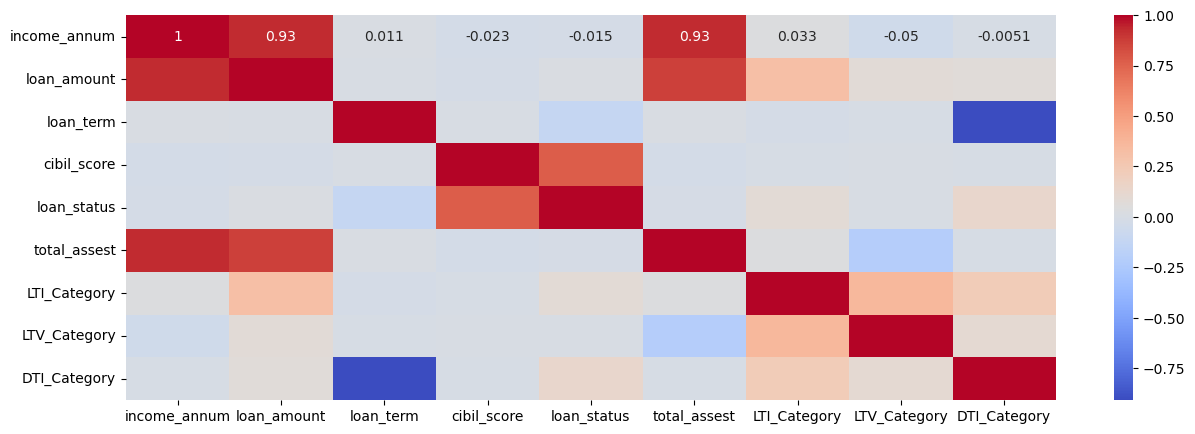

In [52]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")

**VIF**

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Assuming your dataframe is 'df'
# Add a constant to the dataset (for intercept term in the regression)
X = add_constant(df)  # This adds the intercept term

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns

# Compute VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF data
print(vif_data)

        Feature        VIF
0         const  86.599568
1  income_annum  23.031756
2   loan_amount  17.893805
3     loan_term   7.584813
4   cibil_score   2.552623
5   loan_status   2.609150
6  total_assest  10.139649
7  LTI_Category   2.654560
8  LTV_Category   1.572216
9  DTI_Category   8.010757


In [54]:
df.drop(columns=["income_annum","loan_amount","total_assest"],inplace=True) # dropping  more VIF columns

**Feature Scaling**

In [55]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler = StandardScaler()
df[['loan_term', 'cibil_score']] = scaler.fit_transform(df[['loan_term', 'cibil_score']])

In [56]:
df

,loan_term,cibil_score,loan_status,LTI_Category,LTV_Category,DTI_Category
0,0.192617,1.032792,1,1.0,0.0,1.0
1,-0.508091,-1.061051,0,0.0,1.0,2.0
2,1.594031,-0.544840,0,1.0,0.0,0.0
3,-0.508091,-0.771045,0,1.0,0.0,2.0
4,1.594031,-1.264055,0,0.0,0.0,0.0
...,...,...,...,...,...,...
4264,0.192617,-1.641063,0,0.0,0.0,0.0
4265,1.594031,-0.237434,1,1.0,0.0,0.0
4266,1.243677,-0.829046,0,1.0,1.0,1.0
4267,-0.508091,1.044393,1,1.0,0.0,2.0


In [57]:
df.to_csv("clean_data.csv",index=False)

In [58]:
df["DTI_Category"].unique()

array([1., 2., 0., 3.])

In [59]:
df["LTV_Category"].unique()

array([0., 1., 3., 2.])

In [60]:
df["LTI_Category"].unique()

array([1., 0.])